In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statistics

import os
global weather_df

In [3]:
weather_df = pd.read_csv('MAHARASHTRA.csv', parse_dates=['date_time'], index_col='date_time')
weather_df.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,30,22,0.0,11.0,7,1,31,10:21 AM,10:20 PM,07:12 AM,...,27,11,0,49,0.0,1012,22,10,20,10
2009-01-01 01:00:00,30,22,0.0,11.0,7,1,31,10:21 AM,10:20 PM,07:12 AM,...,26,12,0,50,0.0,1012,22,10,18,11
2009-01-01 02:00:00,30,22,0.0,11.0,7,1,31,10:21 AM,10:20 PM,07:12 AM,...,26,14,0,50,0.0,1012,22,10,16,12
2009-01-01 03:00:00,30,22,0.0,11.0,7,1,31,10:21 AM,10:20 PM,07:12 AM,...,25,15,0,50,0.0,1012,22,10,14,13
2009-01-01 04:00:00,30,22,0.0,11.0,7,1,31,10:21 AM,10:20 PM,07:12 AM,...,26,14,0,49,0.0,1013,22,10,28,12


In [7]:
weather_df = weather_df.loc[:,['tempC','precipMM', 'humidity']]
print(f'dataset shape (rows, columns) - {weather_df.shape}')
weather_df.head()

dataset shape (rows, columns) - (96432, 3)


,tempC,precipMM,humidity
date_time,,,
2009-01-01 00:00:00,22,0.0,49
2009-01-01 01:00:00,22,0.0,50
2009-01-01 02:00:00,22,0.0,50
2009-01-01 03:00:00,22,0.0,50
2009-01-01 04:00:00,22,0.0,49


In [8]:
weather_df.describe()

,tempC,precipMM,humidity
count,96432.000000,96432.000000,96432.000000
mean,27.528414,0.152278,66.708914
std,2.889144,0.586189,15.997022
min,0.000000,0.000000,20.000000
25%,26.000000,0.000000,54.000000
50%,27.000000,0.000000,68.000000
75%,29.000000,0.000000,81.000000
max,38.000000,22.500000,96.000000


array([<AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>,
       <AxesSubplot:xlabel='date_time'>], dtype=object)

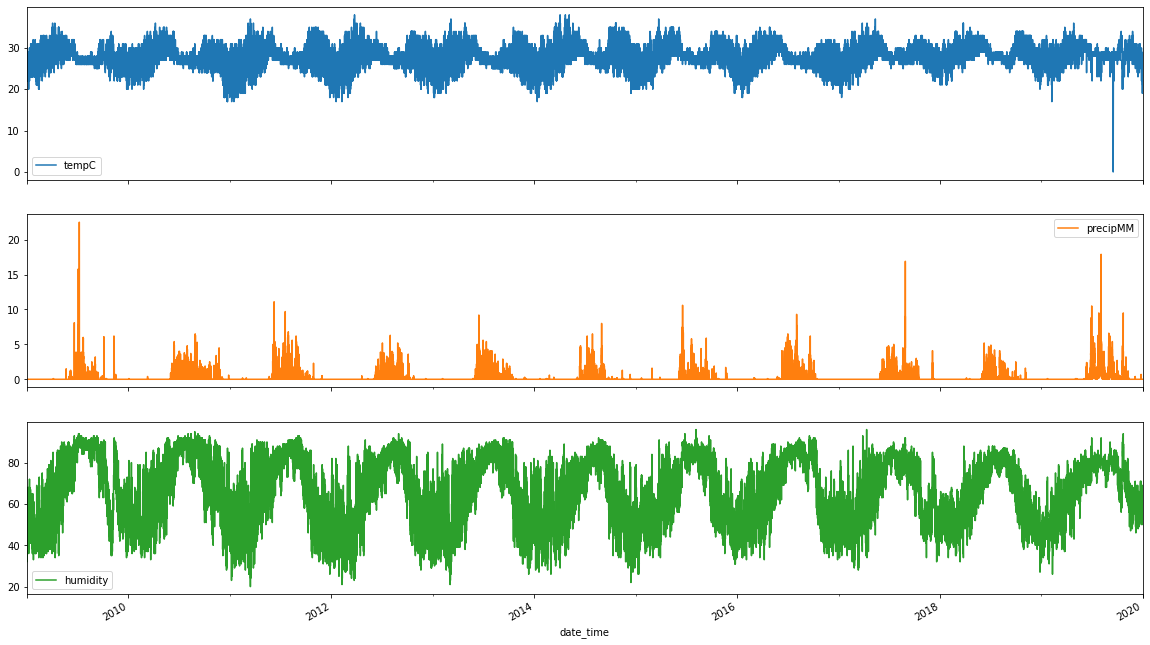

In [9]:
weather_df.plot(subplots=True, figsize=(20,12))

In [3]:
tempdf = pd.DataFrame()
humidf = pd.DataFrame()
percdf = pd.DataFrame()

In [4]:
def ClimatePred(filename):
    df=pd.read_csv(str(filename)+str(".csv"),parse_dates=['date_time'])
    df['year'] = pd.DatetimeIndex(df['date_time']).year
    df['month'] = pd.DatetimeIndex(df['date_time']).month
    
    global tempdf
    x=pd.DataFrame(df.groupby(['year'])[['tempC']].mean().sort_values(by='year',ascending=False))
    tempdf[str(filename)] = x['tempC']
    print(x)
    x=x.reset_index('year')
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(10,8))
    sns.barplot(data=x,x='tempC',y='year',orient='h',palette='viridis')
    
    global humidf
    x=pd.DataFrame(df.groupby(['year'])[['humidity']].mean().sort_values(by='year',ascending=False))
    humidf[str(filename)] = x['humidity']

    global percdf
    x=pd.DataFrame(df.groupby(['year'])[['precipMM']].mean().sort_values(by='year',ascending=False))
    percdf[str(filename)] = x['precipMM']

tempC
year           
2020  18.708333
2019  28.867009
2018  28.118379
2017  27.779452
2016  27.604850
2015  27.936073
2014  28.022260
2013  27.252169
2012  27.383652
2011  26.812215
2010  27.616438
2009  27.769406
          tempC
year           
2020  21.708333
2019  25.017466
2018  24.631050
2017  24.145434
2016  23.949226
2015  23.849087
2014  24.060046
2013  23.810046
2012  23.898224
2011  23.389612
2010  23.627511
2009  23.406735
          tempC
year           
2020  25.083333
2019  28.382763
2018  28.235616
2017  27.697374
2016  27.136043
2015  27.694406
2014  27.612785
2013  27.110731
2012  27.050660
2011  27.133447
2010  27.244292
2009  27.523516
          tempC
year           
2020  21.666667
2019  28.015639
2018  27.814384
2017  27.177968
2016  26.253301
2015  26.819635
2014  26.474543
2013  25.967922
2012  26.282445
2011  25.750571
2010  26.432192
2009  26.492694
          tempC
year           
2020  12.083333
2019  27.417466
2018  27.112671
2017  27.112215
2016  27.303734
20

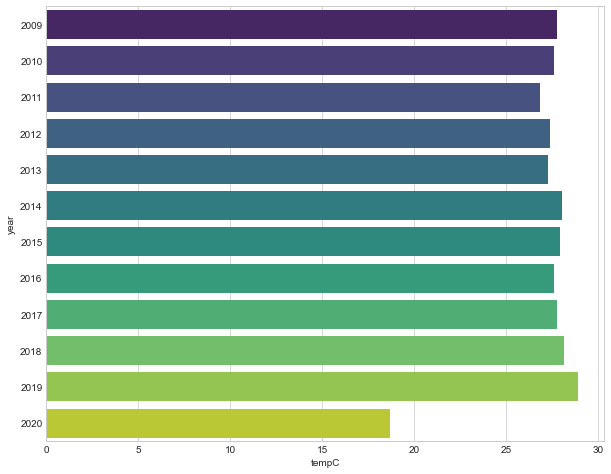

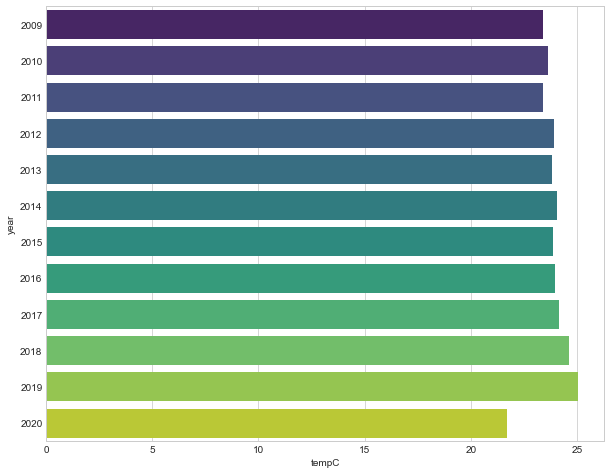

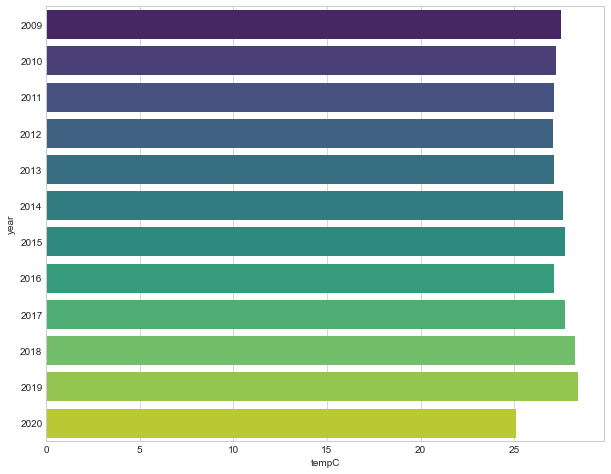

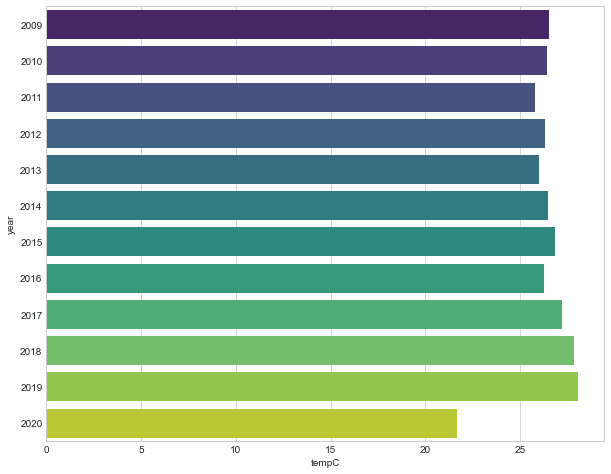

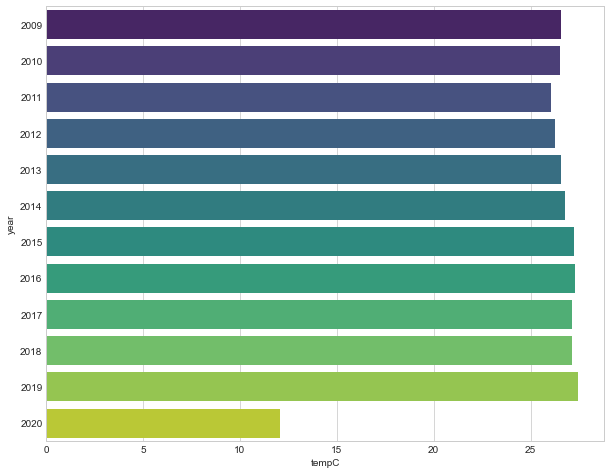

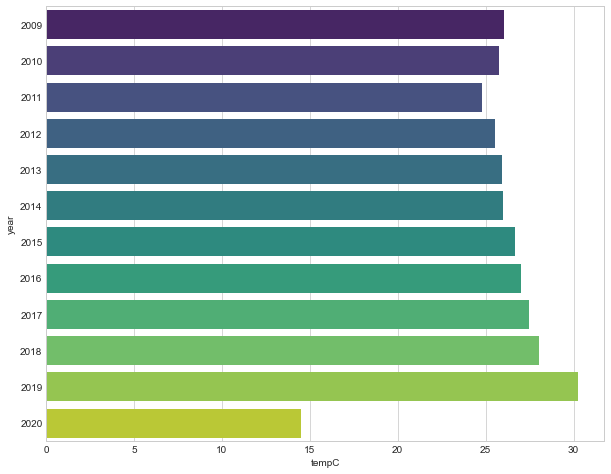

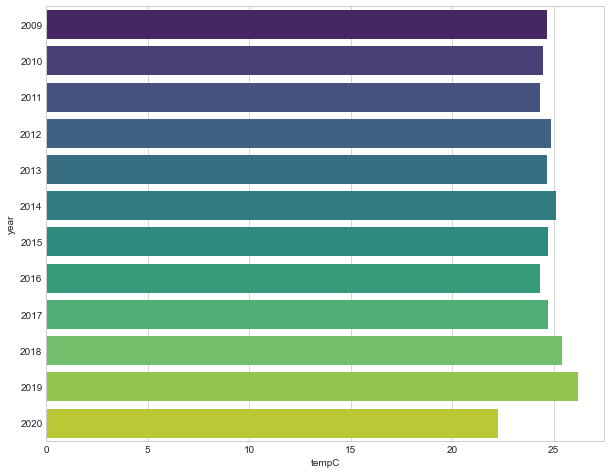

In [5]:
lis = ['UTTAR_PD','KARNATAKA','MAHARASHTRA','ANDHRA_PD','RAJASTHAN','DELHI','TAMIL_NADU']
for i in lis:
    ClimatePred(i)


In [31]:
import plotly.express as px

mean_temp = []
states = []
df = pd.DataFrame()    

#print(tempdf)
for i in tempdf:
    mean_temp.append(statistics.mean(tempdf[i]))
    states.append(i)

df['mean_temperature'] = mean_temp
df['states']= states

fig = px.bar(df, x='states', y='mean_temperature', title="Mean temparature over the past 10 yrs (2010-2020)")
fig.show()

In [32]:
import plotly.express as px

mean_hum = []
states = []
df = pd.DataFrame()    
for i in humidf:
    mean_hum.append(statistics.mean(humidf[i]))
    states.append(i)

df['mean_humidity'] = mean_hum
df['states']= states

fig = px.bar(df, x='states', y='mean_humidity',title="Mean humidity over the past 10 yrs (2010-2020)")
fig.show()


In [35]:
import plotly.express as px

mean_pre = []
states = []
df = pd.DataFrame()    
for i in percdf:
    mean_pre.append(statistics.mean(percdf[i]))
    states.append(i)

df['mean_precipitation'] = mean_pre
df['states']= states

fig = px.bar(df, x='states', y='mean_precipitation',title="Mean precipitation over the past 10 yrs (2010-2020)")
fig.show()
